In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib  import * 
from scipy import stats
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("DataTrained/loan_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.duplicated().any()

False

In [7]:
# Looking for NaN
display(df.isnull().any())

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

##### Dropping since it is not usefull

In [8]:
df.drop('Loan_ID', axis=1, inplace=True)

Y    422
N    192
Name: Loan_Status, dtype: int64


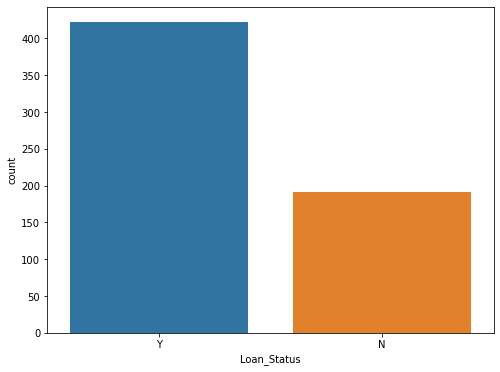

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status']);
print(df.Loan_Status.value_counts())

There are more loans approved than rejected.

In [10]:
df.groupby(['Gender','Married','Education','Self_Employed']).size()

Gender  Married  Education     Self_Employed
Female  No       Graduate      No                53
                               Yes                8
                 Not Graduate  No                10
                               Yes                3
        Yes      Graduate      No                21
                               Yes                3
                 Not Graduate  No                 4
                               Yes                1
Male    No       Graduate      No                81
                               Yes               12
                 Not Graduate  No                25
                               Yes                4
        Yes      Graduate      No               223
                               Yes               38
                 Not Graduate  No                71
                               Yes                9
dtype: int64

In [11]:
df.groupby(['Credit_History','Property_Area','Loan_Amount_Term']).size()

Credit_History  Property_Area  Loan_Amount_Term
0.0             Rural          180.0                 4
                               300.0                 1
                               360.0                21
                Semiurban      180.0                 1
                               300.0                 2
                               360.0                25
                               480.0                 1
                Urban          180.0                 5
                               360.0                20
                               480.0                 3
1.0             Rural          84.0                  1
                               180.0                 7
                               300.0                 2
                               360.0               123
                               480.0                 2
                Semiurban      36.0                  2
                               84.0                  1
                 

#### Credit_History

In [12]:
df.groupby(['Credit_History','Loan_Status']).size()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             N               97
                Y              378
dtype: int64

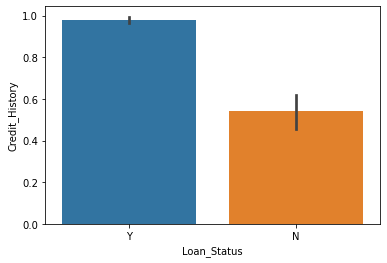

In [13]:
sns.barplot(x ='Loan_Status',y = 'Credit_History',data = df)
plt.show()

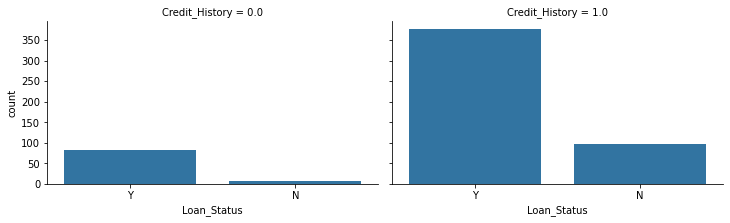

In [14]:
grid = sns.FacetGrid(df,col='Credit_History', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Loan_Status');


For most of the people who have Credit History = 0 they didn't got Loan but for most of people who have Credit History = 1 got Loan.

So we can say if you have Credit History = 1 , you will have better chance to get a loan.



In [15]:
df.groupby(['Gender','Loan_Status']).size()

Gender  Loan_Status
Female  N               37
        Y               75
Male    N              150
        Y              339
dtype: int64

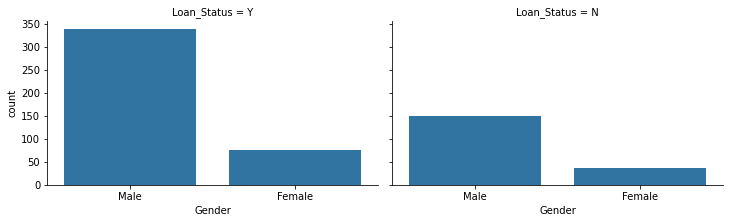

In [16]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender');

most males got loan and most females also got the loan.

In [17]:
df.groupby(['Married','Loan_Status']).size()

Married  Loan_Status
No       N               79
         Y              134
Yes      N              113
         Y              285
dtype: int64

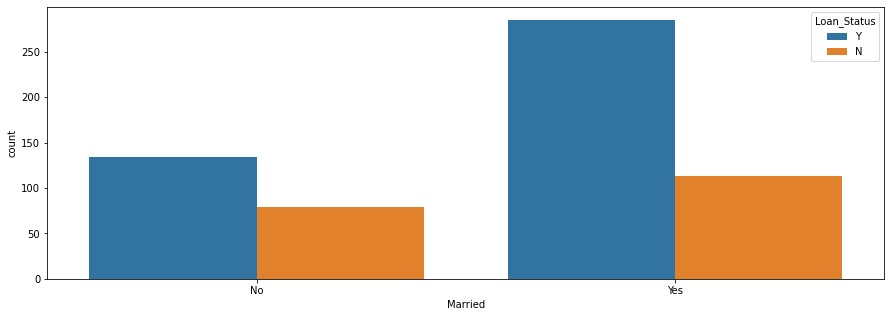

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=df);


most people who get married did get a loan

In [19]:
df.groupby(['Education','Loan_Status']).size()

Education     Loan_Status
Graduate      N              140
              Y              340
Not Graduate  N               52
              Y               82
dtype: int64

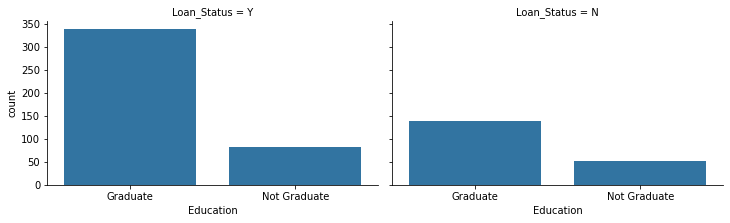

In [20]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education');

If you are graduated or not, you will get almost the same chance to get a loan (we see No pattern here)

In [21]:
df.groupby(['Self_Employed','Loan_Status']).size()

Self_Employed  Loan_Status
No             N              157
               Y              343
Yes            N               26
               Y               56
dtype: int64

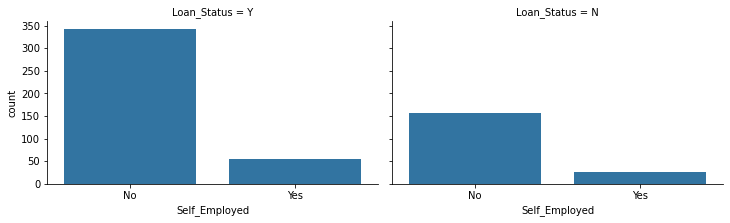

In [22]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Self_Employed');

We don't see any pattern (same as Education)

In [23]:
df.groupby(['Property_Area','Loan_Status']).size()

Property_Area  Loan_Status
Rural          N               69
               Y              110
Semiurban      N               54
               Y              179
Urban          N               69
               Y              133
dtype: int64

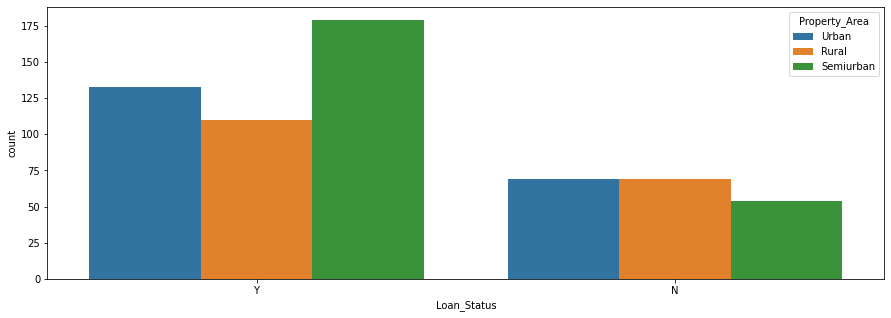

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(x='Loan_Status', hue='Property_Area', data=df);


We can say, Semiurban Property_Area got more than 50% chance to get a loan

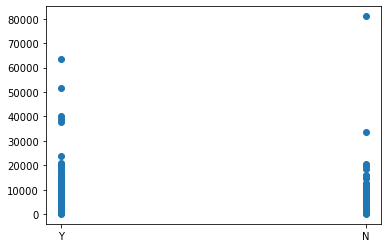

In [25]:
plt.scatter(df['Loan_Status'],df['ApplicantIncome']);


##### ApplicantIncome vs. LoanAmount

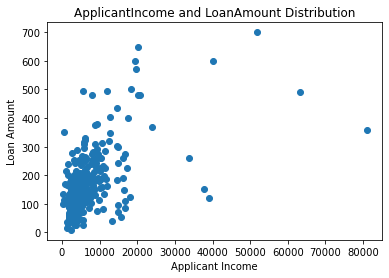

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['ApplicantIncome'],df['LoanAmount'])
plt.title('ApplicantIncome and LoanAmount Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

it looks like there is a positive correlation between 'LoanAmount' and 'ApplicantIncome'. 

###### CoapplicantIncome vs. LoanAmount

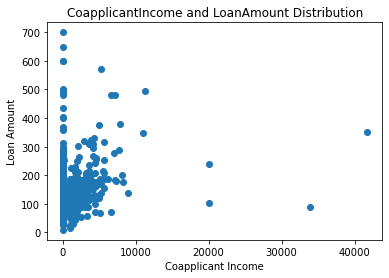

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['CoapplicantIncome'],df['LoanAmount'])
plt.title('CoapplicantIncome and LoanAmount Distribution')
plt.xlabel('Coapplicant Income')
plt.ylabel('Loan Amount')
plt.show()

it looks like a portion of the points sugguests the positive correlation

### Missing values

In [28]:
display(df.isnull().any())

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

Imputation using Most Frequent values For Credit_History

In [29]:
from sklearn.impute import SimpleImputer
im = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')
im = im.fit(df[['Credit_History']])
df['Credit_History'] = im.transform(df[['Credit_History']]).ravel()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### Let's separate the numerical columns from the categorical

In [30]:
categorical_data = []
numerical_data = []

for i,j in enumerate(df.dtypes):
    if j == object:
        categorical_data.append(df.iloc[:, i])
    else :
        numerical_data.append(df.iloc[:, i])
        
categorical_data = pd.DataFrame(categorical_data).transpose()
numerical_data = pd.DataFrame(numerical_data).transpose()

In [31]:
categorical_data.isnull().sum().sort_values()

Education         0
Property_Area     0
Loan_Status       0
Married           3
Gender           13
Dependents       15
Self_Employed    32
dtype: int64

In [32]:
## filling every column with its own most frequent value 

categorical_data = categorical_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [33]:
categorical_data.isnull().sum().sort_values()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [34]:
categorical_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [35]:
numerical_data.isnull().sum().sort_values()

ApplicantIncome       0
CoapplicantIncome     0
Credit_History        0
Loan_Amount_Term     14
LoanAmount           22
dtype: int64

In [36]:
## filling every missing value with their previous value in the same column

numerical_data.fillna(method='bfill', inplace=True)

In [37]:
numerical_data.isnull().sum().sort_values()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [38]:
# transform the target column

target_values = {'Y': 1 , 'N' : 0}

target = categorical_data['Loan_Status']
categorical_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [39]:
target.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

we are going to use LabelEncoder :

what it is actually do it encode labels with value between 0 and n_classes-1

In [40]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

In [41]:
# transform other columns

for i in categorical_data:
    categorical_data[i] = le.fit_transform(categorical_data[i])

In [42]:
categorical_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2


In [43]:
df = pd.concat([categorical_data, numerical_data, target], axis=1)

In [44]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,1
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,1
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,1
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,1


## Modelbuilding using select percentile feature

In [45]:
from sklearn.feature_selection import SelectPercentile, chi2

In [46]:
X = pd.concat([categorical_data, numerical_data], axis=1)
y = target 

SPercentile = SelectPercentile(score_func=chi2, percentile = 80)
SPercentile = SPercentile.fit(X,y)

In [47]:
# seperate the features to check pvalue

cols = SPercentile.get_support(indices=True) # to return index value instead of boolean
print('features index = ',cols)

features = X.columns[cols]
print('features  = ',list(features))

features index =  [ 1  3  5  6  7  8  9 10]
features  =  ['Married', 'Education', 'Property_Area', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [48]:
df_scores= pd.DataFrame({'features':X.columns, 'Chi2Score':SPercentile.scores_, 'pValue':SPercentile.pvalues_})

df_scores.sort_values(by='Chi2Score',ascending=False)

,features,Chi2Score,pValue
7,CoapplicantIncome,11342.041603,0.000000e+00
6,ApplicantIncome,93.904964,3.310429e-22
8,LoanAmount,47.992010,4.279597e-12
10,Credit_History,26.005877,3.403796e-07
9,Loan_Amount_Term,3.778554,5.191351e-02
3,Education,3.540502,5.988732e-02
1,Married,1.782425,1.818518e-01
5,Property_Area,0.377837,5.387629e-01
2,Dependents,0.085953,7.693869e-01
0,Gender,0.036234,8.490324e-01


In [49]:
# creating subset of selected features

X=df[features]

y = target

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [51]:
x_train, x_pred, y_train, y_pred = train_test_split(X_scaler,y, test_size=0.2,random_state=55)

In [52]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### LogisticRegression 

In [53]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [54]:
pred_lr = lr.predict(x_pred)

In [56]:
from sklearn.metrics  import f1_score 
print("Accuracy score: {}".format(accuracy_score(y_pred, pred_lr)*100))
print("F1 score: {}".format(f1_score(y_pred, pred_lr)))
print("="*80)
print(classification_report(y_pred, pred_lr))


Accuracy score: 73.17073170731707
F1 score: 0.8216216216216217
              precision    recall  f1-score   support

           0       0.93      0.30      0.46        46
           1       0.70      0.99      0.82        77

    accuracy                           0.73       123
   macro avg       0.82      0.65      0.64       123
weighted avg       0.79      0.73      0.69       123



### Random Forest Classifier

In [57]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [58]:
pred_rf = rf.predict(x_pred)

In [59]:
print("Accuracy score: {}".format(accuracy_score(y_pred, pred_rf)*100))
print("F1 score: {}".format(f1_score(y_pred, pred_rf)))
print("="*80)
print(classification_report(y_pred, pred_rf))

Accuracy score: 70.73170731707317
F1 score: 0.797752808988764
              precision    recall  f1-score   support

           0       0.73      0.35      0.47        46
           1       0.70      0.92      0.80        77

    accuracy                           0.71       123
   macro avg       0.72      0.63      0.63       123
weighted avg       0.71      0.71      0.68       123



### Decision Tree

In [60]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [61]:
pred_dt = dt.predict(x_pred)

In [62]:
print("Accuracy score: {}".format(accuracy_score(y_pred, pred_dt)*100))
print("F1 score: {}".format(f1_score(y_pred, pred_dt)))
print("="*80)
print(classification_report(y_pred, pred_dt))

Accuracy score: 65.85365853658537
F1 score: 0.7500000000000001
              precision    recall  f1-score   support

           0       0.56      0.39      0.46        46
           1       0.69      0.82      0.75        77

    accuracy                           0.66       123
   macro avg       0.63      0.60      0.61       123
weighted avg       0.64      0.66      0.64       123



### Gradient Boosted Classifier

In [63]:
gb = GradientBoostingClassifier()

In [64]:
gb.fit(x_train, y_train)
pred_gb = gb.predict(x_pred)

In [65]:
print("Accuracy score: {}".format(accuracy_score(y_pred, pred_gb)*100))
print("F1 score: {}".format(f1_score(y_pred, pred_gb)))
print("="*80)
print(classification_report(y_pred, pred_gb))

Accuracy score: 72.35772357723577
F1 score: 0.811111111111111
              precision    recall  f1-score   support

           0       0.80      0.35      0.48        46
           1       0.71      0.95      0.81        77

    accuracy                           0.72       123
   macro avg       0.75      0.65      0.65       123
weighted avg       0.74      0.72      0.69       123



## K-Fold Cross Validation

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
scores_dt = cross_val_score(dt, X_scaler,y, cv=10,scoring = 'f1')
scores_gb = cross_val_score(gb, X_scaler,y, cv=10,scoring = 'f1')
scores_rf = cross_val_score(rf, X_scaler,y, cv=10,scoring = 'f1')

In [68]:
print("Decision Tree CV        : " , scores_dt.mean())
print("Gradient Boosting CV    : " , scores_gb.mean())
print("Random Forest   CV      : " , scores_rf.mean())

Decision Tree CV        :  0.7916749418592888
Gradient Boosting CV    :  0.8574376785324622
Random Forest   CV      :  0.8444456150789655


In [70]:
# import module
from tabulate import tabulate
# assign data
mydata_2 =[ ["Random Forest Classifier",f1_score(y_pred, pred_rf),scores_rf.mean()],
    ["Decision Tree",f1_score(y_pred, pred_dt),scores_dt.mean()],
    ["Gradient Boosted Classifier", f1_score(y_pred, pred_gb),scores_gb.mean()],
    
        ]

 
# create header
head = ["Model", "F1","F1_CV"]
 
# display table
print(tabulate(mydata_2, headers=head, tablefmt="grid"))
table = pd.DataFrame(mydata_2)

+-----------------------------+----------+----------+
| Model                       |       F1 |    F1_CV |
+=============================+==========+==========+
| Random Forest Classifier    | 0.797753 | 0.844446 |
+-----------------------------+----------+----------+
| Decision Tree               | 0.75     | 0.791675 |
+-----------------------------+----------+----------+
| Gradient Boosted Classifier | 0.811111 | 0.857438 |
+-----------------------------+----------+----------+


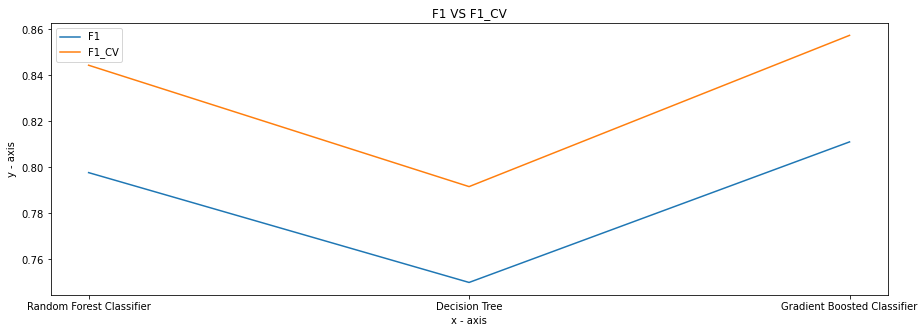

In [71]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(table[0],table[1], label = "F1")
plt.plot(table[0],table[2], label = "F1_CV")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('F1 VS F1_CV')
plt.legend()
plt.show()

### GradientBoosting Tree Using Grid Search

In [72]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=10)
gsearch1.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='roc_auc')

In [73]:
final_model = gsearch1.best_estimator_
final_model

GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           n_estimators=20, random_state=10, subsample=0.8)

In [74]:
#Training the model
tree_clas = GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           n_estimators=80, random_state=10, subsample=0.8)
tree_clas.fit(x_train, y_train)
y_predict = tree_clas.predict(x_pred)

In [75]:
print("Accuracy score: {}".format(accuracy_score(y_pred, y_predict)*100))
print("F1 score: {}".format(f1_score(y_pred, y_predict)))
print("="*80)
print(classification_report(y_pred, y_predict))

Accuracy score: 62.601626016260155
F1 score: 0.77
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.63      1.00      0.77        77

    accuracy                           0.63       123
   macro avg       0.31      0.50      0.39       123
weighted avg       0.39      0.63      0.48       123

